# Analyze Ball on Incline data
Use this notebook to quickly test whether your ball on incline data makes sense!

In [7]:
# Imports
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import statistics

from iminuit import Minuit
sys.path.append('../../External_Functions')
from ExternalFunctions import Chi2Regression

## Reading the data

The function "read_csv(filename)" takes in a filename and returns numpy arrays with time and voltage.

In [8]:
def read_csv(filename):
    """Read CSV from Waveforms"""
    dat = np.genfromtxt(filename, delimiter=',', skip_header=13, names=True)
    time = dat['Time_s']
    voltage = dat['Channel_1_V']
    return time, voltage

def find_midpoints(time, voltage, show_plot=True):
    """Find midpoints -- quick and dirty"""
    
    # Write a function yourself, which identifies the peaks in the voltage,
    # and returns values for passing times and (possibly) their uncertainties in it.
    t_pass = [0.0, 0.1]
    t_pass_sigma = [0.0001, 0.00001]
    
    return t_pass, t_pass_sigma

Text(0, 0.5, 'Voltage (V)')

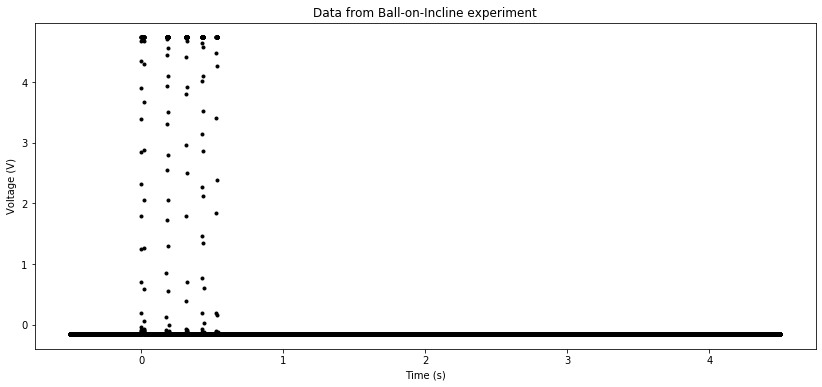

In [9]:
# Read the data and plot it (possibly with passing times in):
filename = '1S01.csv'

time, voltage = read_csv(filename)
timepass, timepass_sig = find_midpoints(time, voltage)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time, voltage, 'k.', label='Measurements')
# ax.set_xlim(chi2_minpos-2*min_fit, chi2_minpos+2*max_fit)
ax.set_title("Data from Ball-on-Incline experiment")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")

In [10]:
def para(time,voltage):
    time_list = []
    i_list = []
    for i in range(len(voltage)):
        if np.sign(voltage[i]) != np.sign(voltage[i-1]):
            i_list.append(i)
            time_list.append(time[i])
    e_list = [1.0/np.sqrt(i_list[1]-i_list[0]),1.0/np.sqrt(i_list[3]-i_list[2]),1.0/np.sqrt(i_list[5]-i_list[4]),1.0/np.sqrt(i_list[7]-i_list[6]),1.0/np.sqrt(i_list[9]-i_list[8])]
    time_list = np.asarray(time_list)
    time_list = time_list-time_list[0]
    time_list = time_list[::2]
    return time_list, e_list




time_l = para(time,voltage)



d1 = np.array([0.2228,0.3536,0.4840,0.6125,0.7432])
d2 = np.array([0.2245,0.3562,0.4853,0.6151,0.7469])
d3 = np.array([0.2252,0.3552,0.4868,0.6156,0.7448])
d4 = np.array([0.2245,0.3556,0.4863,0.6152,0.7461])

d12 = np.array([0,0.3536-0.2228,0.4840-0.2228,0.6125-0.2228,0.7432-0.2228])
d13 = np.array([0,0.3562-0.2245,0.4853-0.2245,0.6151-0.2245,0.7469-0.2245])
d14 = np.array([0,0.3552-0.2252,0.4868-0.2252,0.6156-0.2252,0.7448-0.2252])
d15 = np.array([0,0.3556-0.2245,0.4863-0.2245,0.6152-0.2245,0.7461-0.2245])

g1_dist = [d1[0],d2[0],d3[0],d4[0]]

d_mean = np.zeros(5)
d_error = np.zeros(5)

d_error[0] = statistics.stdev(g1_dist)
d_mean[0] = statistics.mean(g1_dist)

g2_dist = [d1[1],d2[1],d3[1],d4[1]]

d_error[1] = statistics.stdev(g2_dist)
d_mean[1] = statistics.mean(g2_dist)

g3_dist = [d1[2],d2[2],d3[2],d4[2]]

d_error[2] = statistics.stdev(g3_dist)
d_mean[2] = statistics.mean(g3_dist)

g4_dist = [d1[3],d2[3],d3[3],d4[3]]

d_error[3] = statistics.stdev(g4_dist)
d_mean[3] = statistics.mean(g4_dist)

g5_dist = [d1[4],d2[4],d3[4],d4[4]]

d_error[4] = statistics.stdev(g5_dist)
d_mean[4] = statistics.mean(g5_dist)




print(d_mean)
print(d_error)




#plt.plot(time_l,d)
#plt.show()




            

[0.22425 0.35515 0.4856  0.6146  0.74525]
[0.00102144 0.00111206 0.00123558 0.00141657 0.00161761]


In [47]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
def fit_function2(x, alpha0, alpha1, alpha2):
        return alpha0 + alpha1*x + alpha2*x**2

infiles1 = ['1S01.csv','1S02.csv','1S03.csv','1S04.csv','1S05.csv','1S06.csv','1S07.csv','1S08.csv','1S09.csv','1S10.csv',
            '1S11.csv','1S12.csv','1S13.csv','1S14.csv','1S15.csv','1S16.csv','1S17.csv','1S18.csv','1S19.csv','1S20.csv',
            '1S21.csv','1S22.csv','1S23.csv','1S24.csv','1S25.csv']
infiles2= ['2S01.csv','2S02.csv','2S03.csv','2S04.csv','2S05.csv','2S06.csv','2S07.csv','2S08.csv','2S09.csv','2S10.csv',
            '2S11.csv','2S12.csv','2S13.csv','2S14.csv','2S15.csv','2S16.csv','2S17.csv','2S18.csv','2S19.csv','2S20.csv',
            '2S21.csv','2S22.csv','2S23.csv','2S24.csv','2S25.csv']


Nexp = 1
Npoints=5
# Arrays for storing fit results:



# Loop, repeating the data generation and fit:
def fit(infiles):
    array_alpha0 = np.zeros(len(infiles))
    array_alpha1 = np.zeros(len(infiles))
    array_alpha2 = np.zeros(len(infiles))
    array_Chi2 = np.zeros(len(infiles))
    array_Prob = np.zeros(len(infiles))
    array_time = np.zeros((len(infiles),5))
    array_alpha2_err = np.zeros(len(infiles))
    for iexp in range(len(infiles)) : 
        time, voltage = read_csv(infiles[iexp])

        time_l, etime = para(time,voltage)

        def fit_function2(x, alpha0, alpha1, alpha2):
            return alpha0 + alpha1*x + alpha2*x**2

    # Now we define a ChiSquare to be minimised (using probfit), where we set various settings and starting parameters:
        chi2_object = Chi2Regression(fit_function2, time_l, d_mean, d_error) 
        minuit = Minuit(chi2_object, pedantic=False, alpha0=3.0, alpha1=0.0, alpha2=0.0, print_level=0)  
        minuit.migrad();                                                  # Perform the actual fit
        minuit_output = [minuit.get_fmin(), minuit.get_param_states()]    # Save the output parameters in case needed
    
    # Here we extract the fitting parameters and their errors
        alpha0_fit = minuit.values['alpha0']
        alpha1_fit = minuit.values['alpha1']
        alpha2_fit = minuit.values['alpha2']
        sigma_alpha0_fit = minuit.errors['alpha0']
        sigma_alpha1_fit = minuit.errors['alpha1']
        sigma_alpha2_fit = minuit.errors['alpha2']
    
        Nvar = 3                     # Number of variables (alpha0 and alpha1)
        Ndof_fit = 2                 # Number of degrees of freedom = Number of data points - Number of variables
     
    # In Minuit, you can just ask the fit function for the Chi2:
        Chi2_fit = minuit.fval                          # The chi2 value
    
        Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom
    
    # Fill the arrays with fit results (to produce plots of these at the end):
        array_alpha0[iexp] = alpha0_fit
        array_alpha1[iexp] = alpha1_fit
        array_alpha2[iexp] = alpha2_fit
        array_Chi2[iexp] = Chi2_fit
        array_Prob[iexp] = Prob_fit
        array_time[iexp,:] = time_l
        array_alpha2_err[iexp] = sigma_alpha2_fit
        avg_alpha0 = statistics.mean(array_alpha0)
        avg_alpha1 = statistics.mean(array_alpha1)
        avg_alpha2 = statistics.mean(array_alpha2)
    
    # Let us see what the fit gives for the first couple of data sets:
        if (iexp < 100) :
            print(f"  Fit: a0={alpha0_fit:6.4f}+-{sigma_alpha0_fit:5.4f}  a1={alpha1_fit:5.4f}+-{sigma_alpha1_fit:5.4f} a2={alpha2_fit:5.4f}+-{sigma_alpha2_fit:5.4f}  p={Prob_fit:6.4f} Chi2={Chi2_fit:6.4f}")
    return array_alpha2,array_alpha2_err,avg_alpha2
    
a1, a1err, a1avg = fit(infiles1)
a2, a2err, a2avg = fit(infiles2)





  Fit: a0=0.2243+-0.0010  a1=0.6028+-0.0097 a2=0.7197+-0.0191  p=0.8826 Chi2=0.2497
  Fit: a0=0.2244+-0.0010  a1=0.5934+-0.0096 a2=0.7236+-0.0189  p=0.8617 Chi2=0.2978
  Fit: a0=0.2243+-0.0010  a1=0.6007+-0.0097 a2=0.7218+-0.0191  p=0.9018 Chi2=0.2067
  Fit: a0=0.2243+-0.0010  a1=0.6007+-0.0097 a2=0.7242+-0.0191  p=0.9328 Chi2=0.1392
  Fit: a0=0.2243+-0.0010  a1=0.6048+-0.0097 a2=0.7201+-0.0192  p=0.8977 Chi2=0.2158
  Fit: a0=0.2243+-0.0010  a1=0.6017+-0.0097 a2=0.7232+-0.0191  p=0.9246 Chi2=0.1567
  Fit: a0=0.2243+-0.0010  a1=0.6002+-0.0097 a2=0.7209+-0.0190  p=0.9052 Chi2=0.1992
  Fit: a0=0.2243+-0.0010  a1=0.6013+-0.0097 a2=0.7227+-0.0191  p=0.8928 Chi2=0.2268
  Fit: a0=0.2243+-0.0010  a1=0.6010+-0.0097 a2=0.7247+-0.0191  p=0.9575 Chi2=0.0868
  Fit: a0=0.2243+-0.0010  a1=0.5990+-0.0097 a2=0.7215+-0.0190  p=0.9156 Chi2=0.1763
  Fit: a0=0.2243+-0.0010  a1=0.5997+-0.0097 a2=0.7228+-0.0191  p=0.9108 Chi2=0.1868
  Fit: a0=0.2244+-0.0010  a1=0.6010+-0.0097 a2=0.7222+-0.0191  p=0.8561 Chi2

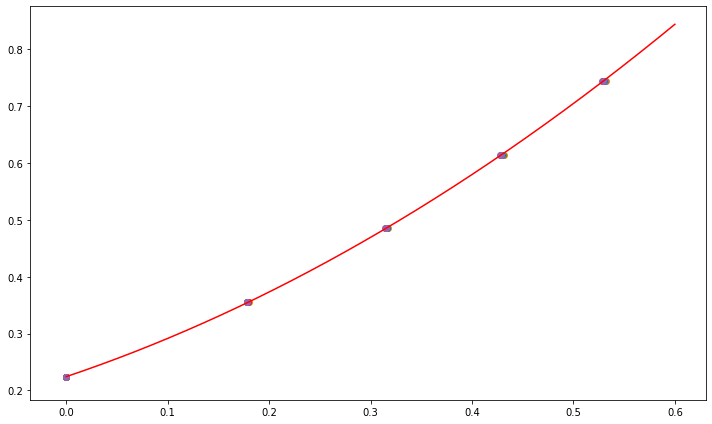

In [48]:
fig, ax = plt.subplots(figsize=(10,6))


for i in range(len(infiles1)):

    ax.scatter(array_time[i], d_mean)
x = np.linspace(0,0.6,1000)
ax.plot(x, fit_function2(x, avg_alpha0,avg_alpha1,avg_alpha2), '-r')
plt.close()
d = {'alpha0':   [alpha0_fit, sigma_alpha0_fit],
     'alpha1':   [alpha1_fit, sigma_alpha1_fit],
     'alpha2':   [alpha2_fit, sigma_alpha2_fit],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_fit,
     'Prob':     Prob_fit,
    }



fig.tight_layout()
fig

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 2., 0., 0., 1., 0.,
        2., 1., 1., 1., 0., 3., 0., 1., 0., 1., 0., 0., 0., 2., 0., 1.]),
 array([0.71533246, 0.71551955, 0.71570663, 0.71589372, 0.71608081,
        0.7162679 , 0.71645498, 0.71664207, 0.71682916, 0.71701625,
        0.71720333, 0.71739042, 0.71757751, 0.7177646 , 0.71795168,
        0.71813877, 0.71832586, 0.71851295, 0.71870003, 0.71888712,
        0.71907421, 0.7192613 , 0.71944839, 0.71963547, 0.71982256,
        0.72000965, 0.72019674, 0.72038382, 0.72057091, 0.720758  ,
        0.72094509, 0.72113217, 0.72131926, 0.72150635, 0.72169344,
        0.72188052, 0.72206761, 0.7222547 , 0.72244179, 0.72262887,
        0.72281596, 0.72300305, 0.72319014, 0.72337723, 0.72356431,
        0.7237514 , 0.72393849, 0.72412558, 0.72431266, 0.72449975,
        0.72468684]),
 <a list of 50 Patch objects>)

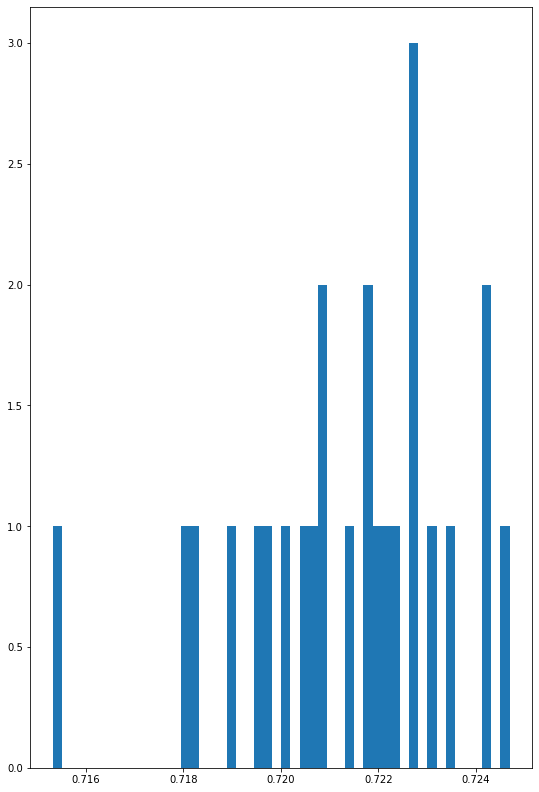

In [49]:
fig_raw, ax = plt.subplots(figsize=(9,14), gridspec_kw={'hspace':0.5})

ax.hist(a1,bins = 50)

------------------------------------------------------------------
| FCN = 20.42                   |    Ncalls=1393 (1393 total)    |
| EDM = 2.2E-05 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.005212232147851633 0.7219264293368383 0.0023495647322132693
20.42036046843747 0.9997463393956562


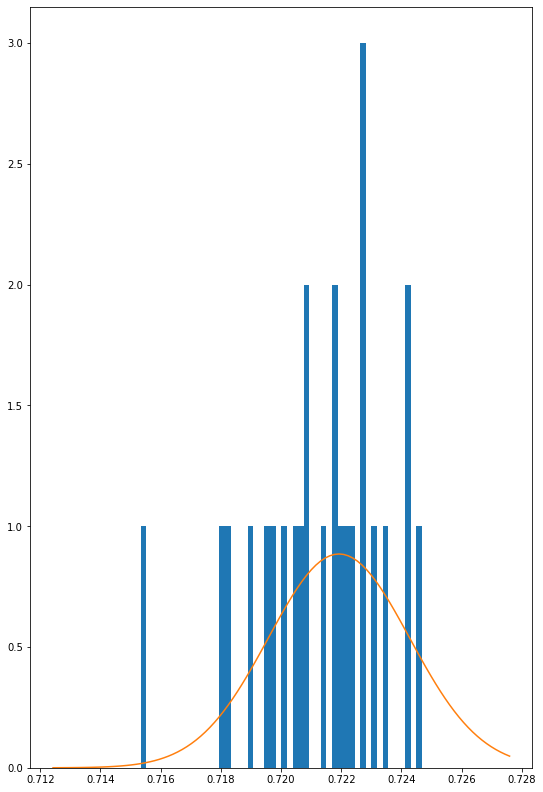

------------------------------------------------------------------
| FCN = 25.85                   |     Ncalls=387 (398 total)     |
| EDM = 4.25 (Goal: 1E-05)      |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
0.014828896584943173 0.7593177186497525 0.008967301999977976
25.8477880228017 0.9948332452699475


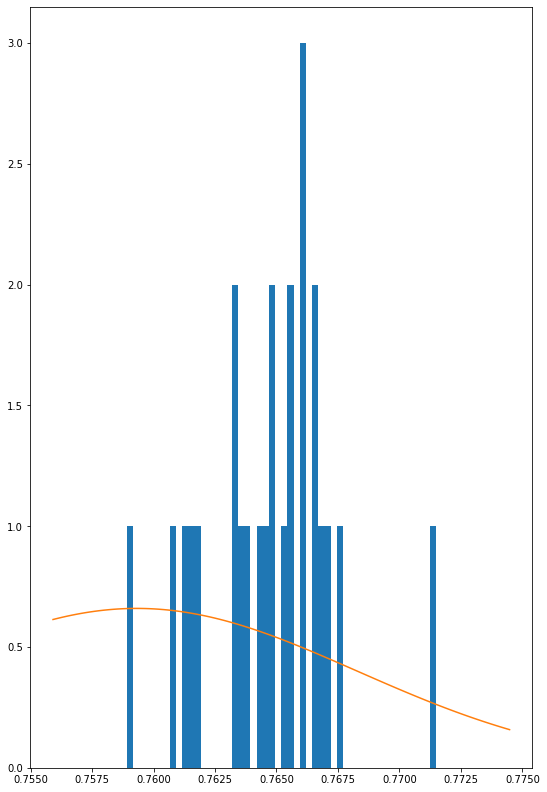

In [56]:
N_bins = 50

def gauss_pdf(x,mu,sigma):
    return 1.0/np.sqrt(2.0*np.pi)/sigma*np.exp(-(x-mu)**2.0/2.0/sigma**2.0)

def gauss_ext(x,N,mu,sigma):
    return N*gauss_pdf(x,mu,sigma)

y_a1, xedge = np.histogram(a1, bins=N_bins, range=(min(a1), max(a1)))
x_a1 = (xedge[1:] + xedge[:-1])/2

chi2_object_a1 = Chi2Regression(gauss_ext, x_a1, y_a1)
minuit = Minuit(chi2_object_a1, pedantic=False, N = 1, mu = a1avg, sigma = statistics.stdev(a1), print_level=1)  
minuit.migrad();                                                  # Perform the actual fit
minuit_output = [minuit.get_fmin(), minuit.get_param_states()]
Na1 = minuit.values['N']
mua1 = minuit.values['mu']
sigmaa1 = minuit.values['sigma']

print(Na1,mua1,sigmaa1)
Chi2_fit_a1 = minuit.fval                          
Prob_fit_a1 = stats.chi2.sf(Chi2_fit_a1, len(x_a1)-3) 
print(Chi2_fit_a1,Prob_fit_a1)

xaxis = np.linspace(min(x_a1)-0.003, max(x_a1)+0.003,100)
yaxis = gauss_ext(xaxis,Na1,mua1,sigmaa1)


fig_raw, ax = plt.subplots(figsize=(9,14), gridspec_kw={'hspace':0.5})

ax.hist(a1,bins = N_bins)
ax.plot(xaxis,yaxis)
plt.show()

y_a2, xedge = np.histogram(a2, bins=N_bins, range=(min(a2), max(a2)))
x_a2 = (xedge[1:] + xedge[:-1])/2

chi2_object_a2 = Chi2Regression(gauss_ext, x_a2, y_a2)
minuit = Minuit(chi2_object_a2, pedantic=False, N = 1, mu = a2avg, sigma = statistics.stdev(a2), print_level=1)  
minuit.migrad();                                                  # Perform the actual fit
minuit_output = [minuit.get_fmin(), minuit.get_param_states()]
Na2 = minuit.values['N']
mua2 = minuit.values['mu']
sigmaa2 = minuit.values['sigma']

print(Na2,mua2,sigmaa2)
Chi2_fit_a2 = minuit.fval                          
Prob_fit_a2 = stats.chi2.sf(Chi2_fit_a2, len(x_a2)-3) 
print(Chi2_fit_a2,Prob_fit_a2)

xaxis = np.linspace(min(a2)-0.003, max(a2)+0.003,100)
yaxis = gauss_ext(xaxis,Na2,mua2,sigmaa2)


fig_raw, ax = plt.subplots(figsize=(9,14), gridspec_kw={'hspace':0.5})

ax.hist(a2,bins =N_bins)
ax.plot(xaxis,yaxis)